Redeneer waarom je keuzes maakt

Gebruik datasets van deze website:https://ourworldindata.org/
Beantwoord de volgende vragen:

1.   What is the biggest predictor of a large CO2 output per capita of a country? 

2.   which countries are making the biggest strides in decreasing CO2 output? deel is al gedaan in de co2 assignment, maar je moet kijken naar de groei van populatie. (=correlatievraag)

3. which non-fossil fuel energy technology will have the best price in the future?



# 1: Biggest predictor of CO2 output
To determine this you may want to consider things like GDP per capita, diets, number of cars per capita, various energy source, mobility and other factors.

Your answer can also be a specific combination of certain factors.

In [1]:
import pandas as pd
import numpy as np

In [ ]:
#Data inlezen, gezocht op de website naar een dataset waar veel variabelen in staan. Daar deze gevonden: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions, doorgelinkd naar: https://github.com/owid/co2-data

df_predictors = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv", encoding = 'cp1252')
df_predictors

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.70,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,ZWE,14030338.0,2.096179e+10,0.639,0.046,10.738,-1.488,-12.17,...,0.02,NaN,NaN,NaN,0.03,NaN,115.92,28.53,1.415,13.18
26004,Zimbabwe,2017,ZWE,14236599.0,2.194784e+10,0.678,0.048,9.582,-1.156,-10.77,...,0.02,NaN,NaN,NaN,0.03,NaN,115.59,28.30,1.666,17.39
26005,Zimbabwe,2018,ZWE,14438812.0,2.271535e+10,0.697,0.048,11.854,2.273,23.72,...,0.02,NaN,NaN,NaN,0.03,NaN,118.22,30.83,1.308,11.04
26006,Zimbabwe,2019,ZWE,14645473.0,NaN,0.697,0.048,10.949,-0.905,-7.64,...,0.02,NaN,NaN,NaN,0.03,NaN,117.96,30.53,1.473,13.45


In [ ]:
#Om te weten welke kolommen ik nodig heb print ik een rij met kolommen
df_predictors.columns


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_glo

In [ ]:
#Vervolgens selecteer ik de kolommen die ik wel wil gebruiken
#Ik wil kijken naar variabelen zoals: populatie, inkomen, gebruik van vernieuwbare bronnen

df_predictors = df_predictors[['country', 'year', 'population', 'gdp', 'co2', 
       'methane', 'nitrous_oxide','primary_energy_consumption']]

df_predictors

,country,year,population,gdp,co2,methane,nitrous_oxide,primary_energy_consumption
0,Afghanistan,1949,7624058.0,NaN,0.015,NaN,NaN,NaN
1,Afghanistan,1950,7752117.0,9.421400e+09,0.084,NaN,NaN,NaN
2,Afghanistan,1951,7840151.0,9.692280e+09,0.092,NaN,NaN,NaN
3,Afghanistan,1952,7935996.0,1.001733e+10,0.092,NaN,NaN,NaN
4,Afghanistan,1953,8039684.0,1.063052e+10,0.106,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,14030338.0,2.096179e+10,10.738,11.98,5.10,46.666
26004,Zimbabwe,2017,14236599.0,2.194784e+10,9.582,12.12,5.24,45.936
26005,Zimbabwe,2018,14438812.0,2.271535e+10,11.854,12.44,5.43,47.502
26006,Zimbabwe,2019,14645473.0,NaN,10.949,12.68,5.50,49.427


In [ ]:
# Omdat ik de co2 per capita wil weten deel ik alle kolommen door de populatie
df_predictors['co2_per_capita'] = df_predictors['co2'] / df_predictors['population']
df_predictors['gdp_per_capita'] = df_predictors['gdp'] / df_predictors['population']
df_predictors['methane_per_capita'] = df_predictors['methane'] / df_predictors['population']
df_predictors['nitrous_oxide_per_capita'] = df_predictors['nitrous_oxide'] / df_predictors['population']
df_predictors['primary_energy_consumption_per_capita'] = df_predictors['primary_energy_consumption'] / df_predictors['population']

df_predictors

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,year,population,gdp,co2,methane,nitrous_oxide,primary_energy_consumption,co2_per_capita,gdp_per_capita,methane_per_capita,nitrous_oxide_per_capita,primary_energy_consumption_per_capita
0,Afghanistan,1949,7624058.0,NaN,0.015,NaN,NaN,NaN,1.967456e-09,NaN,NaN,NaN,NaN
1,Afghanistan,1950,7752117.0,9.421400e+09,0.084,NaN,NaN,NaN,1.083575e-08,1215.332543,NaN,NaN,NaN
2,Afghanistan,1951,7840151.0,9.692280e+09,0.092,NaN,NaN,NaN,1.173447e-08,1236.236369,NaN,NaN,NaN
3,Afghanistan,1952,7935996.0,1.001733e+10,0.092,NaN,NaN,NaN,1.159275e-08,1262.264378,NaN,NaN,NaN
4,Afghanistan,1953,8039684.0,1.063052e+10,0.106,NaN,NaN,NaN,1.318460e-08,1322.255925,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,14030338.0,2.096179e+10,10.738,11.98,5.10,46.666,7.653415e-07,1494.033433,8.538640e-07,3.634980e-07,0.000003
26004,Zimbabwe,2017,14236599.0,2.194784e+10,9.582,12.12,5.24,45.936,6.730540e-07,1541.648846,8.513269e-07,3.680654e-07,0.000003
26005,Zimbabwe,2018,14438812.0,2.271535e+10,11.854,12.44,5.43,47.502,8.209817e-07,1573.214825,8.615667e-07,3.760697e-07,0.000003
26006,Zimbabwe,2019,14645473.0,NaN,10.949,12.68,5.50,49.427,7.476030e-07,NaN,8.657966e-07,3.755427e-07,0.000003


In [ ]:
# Ik wil alleen de gegevens per capita weten, dus ik selecteer de kolommen die ik nodig heb 
df_predictors_per_capita = df_predictors[['co2_per_capita', 'gdp_per_capita', 'methane_per_capita', 'nitrous_oxide_per_capita',  
       'primary_energy_consumption_per_capita']]

df_predictors_per_capita

,co2_per_capita,gdp_per_capita,methane_per_capita,nitrous_oxide_per_capita,primary_energy_consumption_per_capita
0,1.967456e-09,NaN,NaN,NaN,NaN
1,1.083575e-08,1215.332543,NaN,NaN,NaN
2,1.173447e-08,1236.236369,NaN,NaN,NaN
3,1.159275e-08,1262.264378,NaN,NaN,NaN
4,1.318460e-08,1322.255925,NaN,NaN,NaN
...,...,...,...,...,...
26003,7.653415e-07,1494.033433,8.538640e-07,3.634980e-07,0.000003
26004,6.730540e-07,1541.648846,8.513269e-07,3.680654e-07,0.000003
26005,8.209817e-07,1573.214825,8.615667e-07,3.760697e-07,0.000003
26006,7.476030e-07,NaN,8.657966e-07,3.755427e-07,0.000003


In [ ]:
#Ik wil weten of er sprake is van een correlatie daarvoor ga ik de null variabelen eruit halen en de volgende code runnen:
df_predictors_per_capita.dropna().corr()

,co2_per_capita,gdp_per_capita,methane_per_capita,nitrous_oxide_per_capita,primary_energy_consumption_per_capita
co2_per_capita,1.000000,0.714980,0.543087,0.074652,0.903938
gdp_per_capita,0.714980,1.000000,0.287415,0.115103,0.783670
methane_per_capita,0.543087,0.287415,1.000000,0.290534,0.475121
nitrous_oxide_per_capita,0.074652,0.115103,0.290534,1.000000,0.095560
primary_energy_consumption_per_capita,0.903938,0.783670,0.475121,0.095560,1.000000


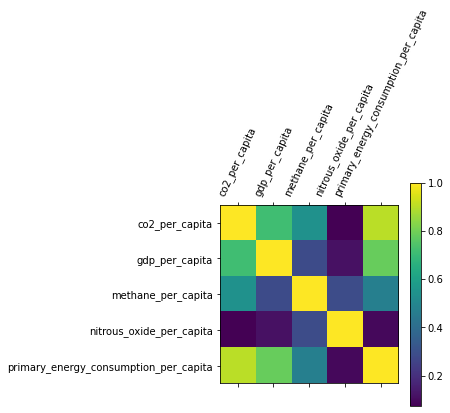

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(df_predictors_per_capita.dropna().corr())
plt.xticks(range(df_predictors_per_capita.select_dtypes(['number']).shape[1]), df_predictors_per_capita.select_dtypes(['number']).columns, fontsize=10, rotation=65)
plt.yticks(range(df_predictors_per_capita.select_dtypes(['number']).shape[1]), df_predictors_per_capita.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
#plt.title('Correlation Matrix', fontsize=16);

plt.show()

# Hoe hoger de correlatie (1 is het hoogst), hoe meer de variabele invloed heeft op de uitstoot van CO2 per capita. In bovenstaand dataframe zie in de kolom co2_per_capita al dat dit de primaire energieconsumptie is (0.903), om dit visueel nog eens duidelijk te maken
# heb ik dit in een plot gezet.Ook daar zie je dat de primaire energie consumptie de grootste voorspeller is. Daarna is het GDP de grootste voorspeller. 

# 2.   which countries are making the biggest strides in decreasing CO2 output? 


which countries are making the biggest strides in decreasing CO2 output? deel is al gedaan in de co2 assignment, maar je moet kijken naar de groei van populatie. (=correlatievraag). 



1.   kijk naar de uitstoot per capita dus per persoon
2.   gebruik een algemenere df
3. kijk even naar pct.change ipv diff want dan heb je procentuele verandering van ieder jaar bijvoorbeeld. Dus gebruik CO2 gedeeld door de bevolking. 
4. maak er een grafiek van, of gesommeerde waardeneming. 



In [ ]:
#Data inlezen, gezocht op de website naar een dataset waar veel variabelen in staan. Daar deze gevonden: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions, doorgelinkd naar: https://github.com/owid/co2-data

df_strides_decreasing_co2 = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv", encoding = 'cp1252')
df_strides_decreasing_co2

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.70,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.00,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,ZWE,14030338.0,2.096179e+10,0.639,0.046,10.738,-1.488,-12.17,...,0.02,NaN,NaN,NaN,0.03,NaN,115.92,28.53,1.415,13.18
26004,Zimbabwe,2017,ZWE,14236599.0,2.194784e+10,0.678,0.048,9.582,-1.156,-10.77,...,0.02,NaN,NaN,NaN,0.03,NaN,115.59,28.30,1.666,17.39
26005,Zimbabwe,2018,ZWE,14438812.0,2.271535e+10,0.697,0.048,11.854,2.273,23.72,...,0.02,NaN,NaN,NaN,0.03,NaN,118.22,30.83,1.308,11.04
26006,Zimbabwe,2019,ZWE,14645473.0,NaN,0.697,0.048,10.949,-0.905,-7.64,...,0.02,NaN,NaN,NaN,0.03,NaN,117.96,30.53,1.473,13.45


In [ ]:
df_strides_decreasing_co2.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_glo

In [ ]:
#Vervolgens selecteer ik de kolommen die ik wel wil gebruiken
#Ik wil kijken naar de co2 vermindering per capita

df_strides_decreasing_co2_per_capita = df_strides_decreasing_co2[['country', 'year', 'co2_per_capita']]

# Als index wil ik het jaartal zodat ik hier gemakkelijk op kan filteren 
df_strides_decreasing_co2_per_capita = df_strides_decreasing_co2_per_capita.set_index('year')
df_strides_decreasing_co2_per_capita

,country,co2_per_capita
year,,
1949,Afghanistan,0.002
1950,Afghanistan,0.011
1951,Afghanistan,0.012
1952,Afghanistan,0.012
1953,Afghanistan,0.013
...,...,...
2016,Zimbabwe,0.765
2017,Zimbabwe,0.673
2018,Zimbabwe,0.821


In [ ]:
#Ik kies een aantal jaren uit die ik goed kan gebruiken, in dit geval 1995 - 2000 2005 2010 2015 2020
df_strides_decreasing_co2_per_capita = df_strides_decreasing_co2_per_capita.loc[[1995, 2000, 2005, 2010, 2015, 2020]]

# met de lege waarden kan je niet werken, dus die halen we eruit
df_strides_decreasing_co2_per_capita = df_strides_decreasing_co2_per_capita.dropna()


In [ ]:
#Ook gaan we de waarden weghalen die we niet nodig hebben. Eerst kijken we welke dat dat zijn
countrys = df_strides_decreasing_co2_per_capita['country'].tolist()
print(countrys)

#uiteindelijk heb ik deze niet nodig gehad. Vond het lastig om een manier te gebruiken om veel landen te verwijderen want met de optie df = df[df['kolom'].str.contains("World")==False], kon ik kiezen voor maximaal 6 waarden
#Ik dacht, ik kan deze in een later stadium één voor één verwijderen maar dat bleek uiteindelijk niet nodig. 


['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia (excl. China & India)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'European Union (27)', 'Eur

In [ ]:
# Nu gaan we de tabel draaien zodat we berekeningen kunnen maken 
# Daarvoor moet je eerst de index los maken
df_reset_index = df_strides_decreasing_co2_per_capita.reset_index()

df_strides_decreasing_co2_per_capita = df_reset_index.pivot(index='country', columns='year', values='co2_per_capita')
df_strides_decreasing_co2_per_capita = df_strides_decreasing_co2_per_capita.dropna()
df_strides_decreasing_co2_per_capita

year,1995,2000,2005,2010,2015,2020
country,,,,,,
Afghanistan,0.068,0.036,0.051,0.288,0.230,0.312
Africa,1.077,1.094,1.155,1.173,1.119,0.990
Albania,0.664,0.960,1.360,1.509,1.555,1.576
Algeria,3.303,2.649,3.212,3.275,3.768,3.535
Andorra,6.656,8.013,7.293,6.117,5.966,6.035
...,...,...,...,...,...,...
Vietnam,0.383,0.658,1.130,1.575,2.082,2.613
World,4.083,4.107,4.525,4.793,4.810,4.465
Yemen,0.694,0.831,0.984,1.000,0.483,0.327


In [ ]:
df_strides_decreasing_co2_per_capita.columns

Int64Index([1995, 2000, 2005, 2010, 2015, 2020], dtype='int64', name='year')

In [ ]:
#we gaan de verandering berekenen 
df_strides_decreasing_co2_per_capita['rel_1995'] = 100
df_strides_decreasing_co2_per_capita['rel_2000'] = ((df_strides_decreasing_co2_per_capita[2000] - df_strides_decreasing_co2_per_capita[1995]) / df_strides_decreasing_co2_per_capita[1995]) * 100
df_strides_decreasing_co2_per_capita['rel_2005'] = ((df_strides_decreasing_co2_per_capita[2005] - df_strides_decreasing_co2_per_capita[1995]) / df_strides_decreasing_co2_per_capita[1995]) * 100
df_strides_decreasing_co2_per_capita['rel_2010'] = ((df_strides_decreasing_co2_per_capita[2010] - df_strides_decreasing_co2_per_capita[1995]) / df_strides_decreasing_co2_per_capita[1995]) * 100
df_strides_decreasing_co2_per_capita['rel_2015'] = ((df_strides_decreasing_co2_per_capita[2015] - df_strides_decreasing_co2_per_capita[1995]) / df_strides_decreasing_co2_per_capita[1995]) * 100
df_strides_decreasing_co2_per_capita['rel_2020'] = ((df_strides_decreasing_co2_per_capita[2020] - df_strides_decreasing_co2_per_capita[1995]) / df_strides_decreasing_co2_per_capita[1995]) * 100

df_strides_decreasing_co2_per_capita

year,1995,2000,2005,2010,2015,2020,rel_1995,rel_2000,rel_2005,rel_2010,rel_2015,rel_2020
country,,,,,,,,,,,,
Afghanistan,0.068,0.036,0.051,0.288,0.230,0.312,100,-47.058824,-25.000000,323.529412,238.235294,358.823529
Africa,1.077,1.094,1.155,1.173,1.119,0.990,100,1.578459,7.242340,8.913649,3.899721,-8.077994
Albania,0.664,0.960,1.360,1.509,1.555,1.576,100,44.578313,104.819277,127.259036,134.186747,137.349398
Algeria,3.303,2.649,3.212,3.275,3.768,3.535,100,-19.800182,-2.755071,-0.847714,14.078111,7.023918
Andorra,6.656,8.013,7.293,6.117,5.966,6.035,100,20.387620,9.570313,-8.097957,-10.366587,-9.329928
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.383,0.658,1.130,1.575,2.082,2.613,100,71.801567,195.039164,311.227154,443.603133,582.245431
World,4.083,4.107,4.525,4.793,4.810,4.465,100,0.587803,10.825373,17.389175,17.805535,9.355866
Yemen,0.694,0.831,0.984,1.000,0.483,0.327,100,19.740634,41.786744,44.092219,-30.403458,-52.881844


In [ ]:
print(df_strides_decreasing_co2_per_capita.columns)

Index([      1995,       2000,       2005,       2010,       2015,       2020,
       'rel_1995', 'rel_2000', 'rel_2005', 'rel_2010', 'rel_2015', 'rel_2020'],
      dtype='object', name='year')


In [ ]:
#Nu we de relatieve verandering hebben berekend gaan we de tabel sorteren
# Eerst selecteren we de bruikbare kolommen
df_strides_decreasing_co2_per_capita_rel = df_strides_decreasing_co2_per_capita[['rel_1995', 'rel_2000', 'rel_2005', 'rel_2010', 'rel_2015', 'rel_2020']]

#Daarna gaan we deze sorteren. Ik zie weer een aantal nulwaarden (ook al waren deze eruit dacht ik?), dus ik verwijder deze opnieuw
df_strides_decreasing_co2_per_capita_rel = df_strides_decreasing_co2_per_capita_rel.dropna()
# Ik sorteer de waarden. Ik heb nu gekozen voor ascending, maar dat had niet per se uitgemaakt.
df_strides_decreasing_co2_per_capita_rel = df_strides_decreasing_co2_per_capita_rel.sort_values(by='rel_2020', ascending = False)

# Ik wil de landen weten die de grootste stappen hebben gemaakt in het terugdringen van de CO2, in dit geval dus de onderste vijf
df_top_5_decresing_countries = df_strides_decreasing_co2_per_capita_rel.tail(5)

df_strides_decreasing_co2_per_capita_rel

year,rel_1995,rel_2000,rel_2005,rel_2010,rel_2015,rel_2020
country,,,,,,
Equatorial Guinea,100,497.058824,6208.823529,4141.176471,5353.529412,4204.117647
Laos,100,30.434783,68.840580,248.550725,892.753623,3271.014493
Mongolia,100,-9.162304,-1.279814,47.789412,125.479930,684.700407
Bosnia and Herzegovina,100,311.373874,379.842342,542.680180,506.193694,635.135135
Vietnam,100,71.801567,195.039164,311.227154,443.603133,582.245431
...,...,...,...,...,...,...
French Guiana,100,-40.478949,-43.414446,-40.961761,-48.030127,-52.896871
Gabon,100,-10.459364,-17.691402,-30.624264,-36.277974,-54.511190
Somalia,100,-31.645570,-27.848101,-35.443038,-41.772152,-55.696203


In [ ]:
# Ik wil controleren of het df eruit ziet zoals ik wil, dus ik run hem nog eens
df_top_5_decresing_countries

year,rel_1995,rel_2000,rel_2005,rel_2010,rel_2015,rel_2020
country,,,,,,
French Guiana,100,-40.478949,-43.414446,-40.961761,-48.030127,-52.896871
Gabon,100,-10.459364,-17.691402,-30.624264,-36.277974,-54.511190
Somalia,100,-31.645570,-27.848101,-35.443038,-41.772152,-55.696203
Denmark,100,-13.658371,-19.306889,-24.811008,-47.439055,-61.590079
North Korea,100,-18.859295,-15.684692,-45.170837,-73.688458,-69.410815


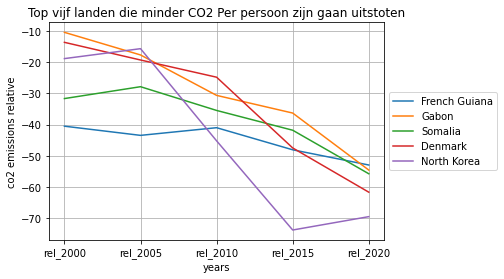

In [ ]:
# We willen zichtbaar maken wat we nu zojuist hebben gedaan
# Dit doe ik via een plot. 
# ik begrijp niet waarom ik rij 0 selecteer maar hij toch de eerste rij pakt bij het label 
import matplotlib.pyplot as plt
import numpy as np

years = df_top_5_decresing_countries.columns[1:]
for i, row in df_top_5_decresing_countries.iterrows():
  plt.plot(years, row[1:], label=i)

plt.title("Top vijf landen die minder CO2 Per persoon zijn gaan uitstoten")
plt.xlabel("years")
plt.ylabel("co2 emissions relative")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Uit zowel het dataframe als uit deze plot is zichtbaar dat North Korea de grootste stappen heeft gemaakt in het minder uitstoten van Co2 per persoon. 

#  3. which non-fossil fuel energy technology will have the best price in the future?
Non-fossiel fuel is alles wat vernieuwbaar is. De vraag is dus welke vernieuwbare energie (bijv. zonne/ wind) heeft de beste prijs. Kijk dus ook naar de prijzen, wat is het goedkoopste. Twh = tijd en gaat niet over monetair. Gebruik hiervoor lineaire regressie. 

In [2]:
# Data inlezen
# op deze website een tabel gevonden wat gaat over de kosten per hydrowat: https://ourworldindata.org/search?q=cost+per+energy 

df_cost_non_fossil = pd.read_csv("/content/levelized-cost-of-energy.csv", encoding = 'cp1252')
df_cost_non_fossil

,Entity,Code,Year,CSP LCOE (2019 USD/kWh),Hydro LCOE (2019 USD/kWh),Solar LCOE (2019 USD/kWh),Onshore wind LCOE (2019 USD/kWh),Bioenergy LCOE (2019 USD/kWh),Geothermal LCOE (2019 USD/kWh),Offshore wind LCOE (2019 USD/kWh)
0,Brazil,BRA,1998,NaN,NaN,NaN,0.069,NaN,NaN,NaN
1,Brazil,BRA,2001,NaN,NaN,NaN,0.149,NaN,NaN,NaN
2,Brazil,BRA,2002,NaN,NaN,NaN,0.129,NaN,NaN,NaN
3,Brazil,BRA,2003,NaN,NaN,NaN,0.145,NaN,NaN,NaN
4,Brazil,BRA,2005,NaN,NaN,NaN,0.137,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
408,World,OWID_WRL,2005,NaN,NaN,NaN,0.104,NaN,NaN,0.105
409,World,OWID_WRL,2006,NaN,NaN,NaN,0.105,NaN,NaN,0.108
410,World,OWID_WRL,2007,NaN,NaN,NaN,0.098,NaN,0.048498,0.178
411,World,OWID_WRL,2008,NaN,NaN,NaN,0.088,NaN,0.042653,0.178


In [3]:
#Om te weten welke kolommen ik nodig heb print ik een rij met kolommen

df_cost_non_fossil.columns

Index(['Entity', 'Code', 'Year', 'CSP LCOE (2019 USD/kWh)',
       'Hydro LCOE (2019 USD/kWh)', 'Solar LCOE (2019 USD/kWh)',
       'Onshore wind LCOE (2019 USD/kWh)', 'Bioenergy LCOE (2019 USD/kWh)',
       'Geothermal LCOE (2019 USD/kWh)', 'Offshore wind LCOE (2019 USD/kWh)'],
      dtype='object')

In [4]:
#Vervolgens selecteer ik de kolommen die ik wel wil gebruiken
#Eigenlijk wil ik bijna alle kolommen gebruiken, omdat deze informatie bezitten over non-fossiele brandstof (hydro, solar, bio, offshorewind).

df_cost_non_fossil = df_cost_non_fossil.drop(columns=['Code'])

#De namen zijn wel lang en daarom onhandig dus deze ga ik wel aanpassen. 
df_cost_non_fossil = df_cost_non_fossil.rename(columns={'CSP LCOE (2019 USD/kWh)': 'CSP', 'Hydro LCOE (2019 USD/kWh)' : 'Hydro', 'Solar LCOE (2019 USD/kWh)' : 'Solar',
       'Onshore wind LCOE (2019 USD/kWh)': 'Onshore_wind', 'Bioenergy LCOE (2019 USD/kWh)' : 'Bioenergy',
       'Geothermal LCOE (2019 USD/kWh)' : 'Geothermal', 'Offshore wind LCOE (2019 USD/kWh)': 'Offshore_wind'})

#Omdat dit een algemene vraag is heb je eigenlijk alleen de totale informatie nodig. In dit geval gebruik ik daarom ook de Entity 'World'. 
df_cost_non_fossil = df_cost_non_fossil[df_cost_non_fossil['Entity'].str.contains("World")==True]


# De kolom 'Entity' mag verwijderd worden en ik wil zet de jaartallen op de index 
df_cost_non_fossil = df_cost_non_fossil.drop(columns=['Entity'])
df_cost_non_fossil.sort_values(by=['Year'], inplace=True)


df_cost_non_fossil


,Year,CSP,Hydro,Solar,Onshore_wind,Bioenergy,Geothermal,Offshore_wind
386,1983,NaN,NaN,NaN,0.308,NaN,NaN,NaN
387,1984,NaN,NaN,NaN,0.294,NaN,NaN,NaN
388,1985,NaN,NaN,NaN,0.276,NaN,NaN,NaN
389,1986,NaN,NaN,NaN,0.247,NaN,NaN,NaN
390,1987,NaN,NaN,NaN,0.240,NaN,NaN,NaN
391,1988,NaN,NaN,NaN,0.201,NaN,NaN,NaN
392,1989,NaN,NaN,NaN,0.187,NaN,NaN,NaN
393,1990,NaN,NaN,NaN,0.204,NaN,NaN,NaN
394,1991,NaN,NaN,NaN,0.196,NaN,NaN,NaN
395,1992,NaN,NaN,NaN,0.193,NaN,NaN,NaN


In [5]:
# Uit de dataframe blijkt dat er pas vanaf 2010 informatie is over de verschillende energiebronnen. Daarom ga ik het dataframe nog meer aanpassen. 
df_cost_non_fossil = df_cost_non_fossil.loc[df_cost_non_fossil['Year'] > 2010]
df_cost_non_fossil

,Year,CSP,Hydro,Solar,Onshore_wind,Bioenergy,Geothermal,Offshore_wind
377,2011,0.3484,0.035594,0.2863,0.083,0.055425,NaN,0.175
378,2012,0.3525,0.037753,0.2225,0.083,0.060869,0.084536,0.154
379,2013,0.2681,0.042926,0.1751,0.082,0.081262,0.061515,0.177
380,2014,0.2432,0.043932,0.1636,0.076,0.082069,0.063591,0.183
381,2015,0.2508,0.039014,0.1264,0.069,0.073028,0.060107,0.169
382,2016,0.2903,0.052220,0.1139,0.066,0.071932,0.069951,0.146
383,2017,0.2533,0.055025,0.0924,0.064,0.072432,0.074109,0.131
384,2018,0.1844,0.044514,0.0787,0.058,0.056632,0.070282,0.127
385,2019,0.1823,0.047287,0.0684,0.053,0.065647,0.071860,0.115


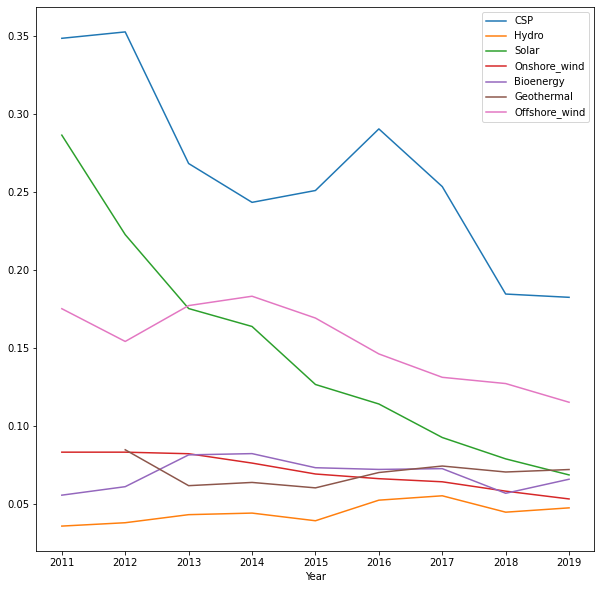

In [6]:
#Vervolgens wil ik de data in een plot krijgen. Ik wil zien hoe de ontwikkelingen gaan de afgelopen jaren. 
#De data loopt tot 2019 maar je ziet bijvoorbeeld dat Solar technologie steeds goedkoper wordt (stijle lijn)
#Maar dat op dit moment Hydro technologie nog het goedkoopst is. Conclusie: als deze trend zich voortzet dan wordt Solartechnologie het goedkoopst. 

import matplotlib.pyplot as plt

df = pd.DataFrame(df_cost_non_fossil, columns=['Year','CSP', 'Hydro', 'Solar', 'Onshore_wind', 'Bioenergy', 'Geothermal', 'Offshore_wind'])
df.plot(x="Year", y=['CSP', 'Hydro', 'Solar', 'Onshore_wind', 'Bioenergy', 'Geothermal', 'Offshore_wind'], kind='line', figsize=(10,10))

In [7]:
# Voor lineaire regressie heb je andere libraries nodig deze ga ik inlezen
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [8]:
# Alle legen waarden moeten eruit worden gehaald
df_without_na = df_cost_non_fossil.dropna()
df_without_na

,Year,CSP,Hydro,Solar,Onshore_wind,Bioenergy,Geothermal,Offshore_wind
378,2012,0.3525,0.037753,0.2225,0.083,0.060869,0.084536,0.154
379,2013,0.2681,0.042926,0.1751,0.082,0.081262,0.061515,0.177
380,2014,0.2432,0.043932,0.1636,0.076,0.082069,0.063591,0.183
381,2015,0.2508,0.039014,0.1264,0.069,0.073028,0.060107,0.169
382,2016,0.2903,0.052220,0.1139,0.066,0.071932,0.069951,0.146
383,2017,0.2533,0.055025,0.0924,0.064,0.072432,0.074109,0.131
384,2018,0.1844,0.044514,0.0787,0.058,0.056632,0.070282,0.127
385,2019,0.1823,0.047287,0.0684,0.053,0.065647,0.071860,0.115


In [9]:
# Per variabele maak je een los dataframe
CSP = df_without_na[['Year', 'CSP']]
Hydro = df_without_na[['Year', 'Hydro']]
Solar = df_without_na[['Year', 'Solar']]
Onshore_wind = df_without_na[['Year', 'Onshore_wind']]
Bioenergy = df_without_na[['Year', 'Bioenergy']]
Geothermal = df_without_na[['Year', 'Geothermal']]
Offshore_wind = df_without_na[['Year', 'Offshore_wind']]

In [10]:
# vervolgens moet je van elk dataframe een x en een y bepalen. Omdat de x overal hetzelfde is hoef je die maar 1x te bepalen
x=CSP['Year'].values.reshape(-1,1)

y_CSP=CSP['CSP'].values.reshape(-1,1)
y_Hydro=Hydro['Hydro'].values.reshape(-1,1)
y_Solar=Solar['Solar'].values.reshape(-1,1)
y_Onshore_wind=Onshore_wind['Onshore_wind'].values.reshape(-1,1)
y_Bioenergy=Bioenergy['Bioenergy'].values.reshape(-1,1)
y_Geothermal=Geothermal['Geothermal'].values.reshape(-1,1)
y_Offshore_wind=Offshore_wind['Offshore_wind'].values.reshape(-1,1)


In [35]:
#daarna gebruik je de functie train_test_split om de dataset om te zetten in een dataset voor te trainen voor te testen. Dit doe ik weer voor alle verschillende y-variabelen
x_train_CSP, x_test_CSP, y_train_CSP,y_test_CSP = train_test_split(x,y_CSP, test_size=0.3, random_state=0)
x_train_Hydro, x_test_Hydro, y_train_Hydro,y_test_Hydro = train_test_split(x,y_Hydro, test_size=0.3, random_state=0)
x_train_Solar, x_test_Solar, y_train_Solar,y_test_Solar = train_test_split(x,y_Solar, test_size=0.3, random_state=0)
x_train_Onshore_wind, x_test_Onshore_wind, y_train_Onshore_wind,y_test_Onshore_wind = train_test_split(x,y_Onshore_wind, test_size=0.3, random_state=0)
x_train_Bioenergy, x_test_Bioenergy, y_train_Bioenergy,y_test_Bioenergy = train_test_split(x,y_Bioenergy, test_size=0.3, random_state=0)
x_train_Geothermal, x_test_Geothermal, y_train_Geothermal,y_test_Geothermal = train_test_split(x,y_Geothermal, test_size=0.3, random_state=0)
x_train_Offshore_wind, x_test_Offshore_wind, y_train_Offshore_wind,y_test_Offshore_wind = train_test_split(x,y_Offshore_wind, test_size=0.3, random_state=0)

In [12]:
#je maakt alvast een lijst voor de x-as van het aantal jaren die je in je model terug wil zien
x_years = (np.arange(2010, 2031)).reshape(-1,1)

In [15]:
# je benoemt de ml 
ml=LinearRegression()


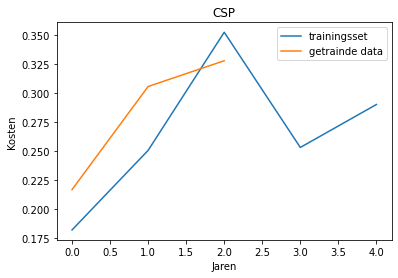

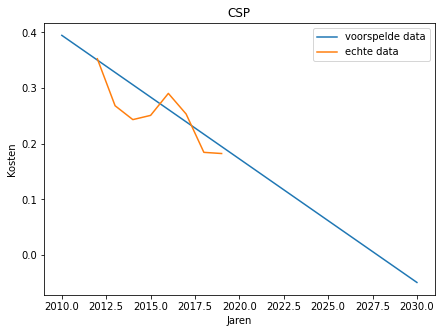

In [16]:
# Ik begin met CSP
ml.fit(x_train_CSP, y_train_CSP)

# Hierna doe je de voorspelling
y_pred_CSP = ml.predict(x_test_CSP)

#Je kan kijken wat het verschil is tussen de test en echte data
#print(y_train_CSP, y_pred_CSP)
plt.plot(y_train_CSP, label = 'trainingsset')
plt.plot(y_pred_CSP, label = 'getrainde data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('CSP')
plt.legend()

#Nu doe je de voorspelling voor de kosten op basis van het aantal jaren dat je in de regressie wil
y_years = ml.predict(x_years)
#print(y_years)

#evalueer je model, hoe hoger de score hoe meer het zegt over de juistheid van het je model
#print(r2_score(y_test_CSP, y_pred_CSP))

# plot je resultaat
plt.figure(figsize= (7,5))
plt.plot(x_years, y_years, label='voorspelde data')
plt.plot(x, y_CSP, label= 'echte data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('CSP')
plt.legend()

#CSP wordt steeds goedkoper, je zit dat deze in 2030 bijna 0.0 kost. 


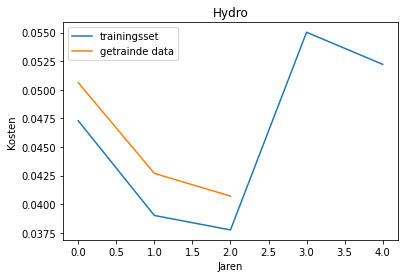

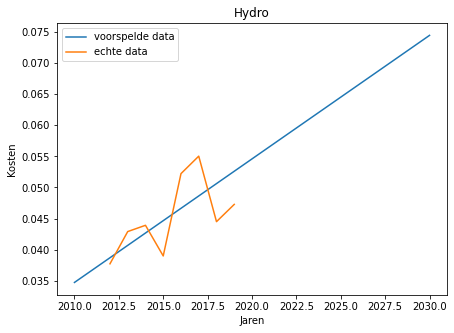

In [17]:
# Vervolg Hydro
ml.fit(x_train_Hydro, y_train_Hydro)

# Hierna doe je de voorspelling
y_pred_Hydro = ml.predict(x_test_Hydro)

#Je kan kijken wat het verschil is tussen de test en echte data
#print(y_train_Hydro, y_pred_Hydro)
plt.plot(y_train_Hydro, label = 'trainingsset')
plt.plot(y_pred_Hydro, label ='getrainde data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Hydro')
plt.legend()

#Nu doe je de voorspelling voor de kosten op basis van het aantal jaren dat je in de regressie wil
y_years = ml.predict(x_years)
#print(y_years)

#evalueer je model, hoe hoger de score hoe meer het zegt over de juistheid van het je model
#print(r2_score(y_test_Hydro, y_pred_Hydro))

# plot je resultaat
plt.figure(figsize= (7,5))
plt.plot(x_years, y_years, label='voorspelde data')
plt.plot(x, y_Hydro, label= 'echte data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Hydro')
plt.legend()

#conclusie Hydro wordt alleen maar duurder. 

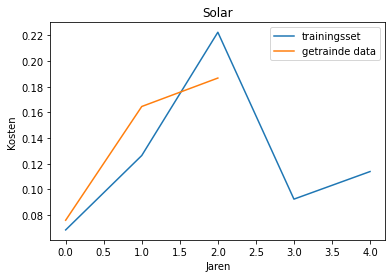

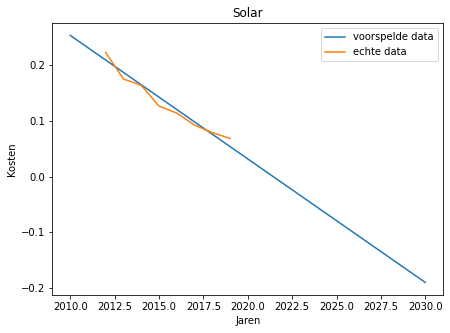

In [18]:
# Vervolg Solar
ml.fit(x_train_Solar, y_train_Solar)

# Hierna doe je de voorspelling
y_pred_Solar = ml.predict(x_test_Solar)

#Je kan kijken wat het verschil is tussen de test en echte data
#print(y_train_Solar, y_pred_Solar)
plt.plot(y_train_Solar, label = 'trainingsset')
plt.plot(y_pred_Solar, label ='getrainde data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Solar')
plt.legend()

#Nu doe je de voorspelling voor de kosten op basis van het aantal jaren dat je in de regressie wil
y_years = ml.predict(x_years)
#print(y_years)

#evalueer je model, hoe hoger de score hoe meer het zegt over de juistheid van het je model
#print(r2_score(y_test_Hydro, y_pred_Hydro))

# plot je resultaat
plt.figure(figsize= (7,5))
plt.plot(x_years, y_years, label='voorspelde data')
plt.plot(x, y_Solar, label= 'echte data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Solar')
plt.legend()

#conclusie Solar wordt steeds goedkoper. Als deze trend zich voortzet dan zouden de kosten zelfs negatief worden (dus dat je geld krijgt als je van Solar gebruikt maakt), dat is in de praktijk onwaarschijnlijk maar het geeft wel inzicht in het feit dat Solar goedkoop gaat worden.

0.9551949637575728


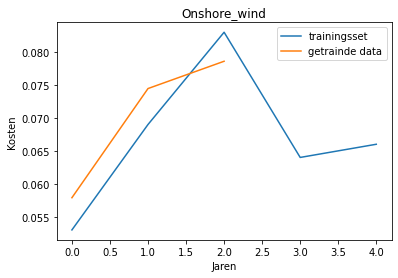

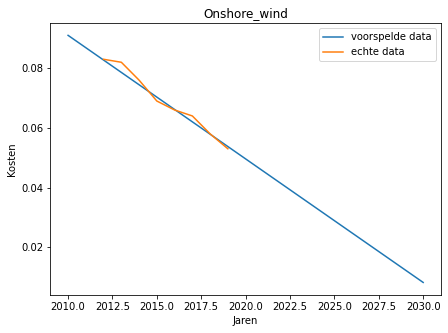

In [36]:
# Vervolg Onshore_wind
ml.fit(x_train_Onshore_wind, y_train_Onshore_wind)

# Hierna doe je de voorspelling
y_pred_Onshore_wind = ml.predict(x_test_Onshore_wind)

#Je kan kijken wat het verschil is tussen de test en echte data
#print(y_train_Onshore_wind, y_pred_Onshore_wind)
plt.plot(y_train_Onshore_wind, label = 'trainingsset')
plt.plot(y_pred_Onshore_wind, label ='getrainde data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Onshore_wind')
plt.legend()

#Nu doe je de voorspelling voor de kosten op basis van het aantal jaren dat je in de regressie wil
y_years = ml.predict(x_years)
#print(y_years)

#evalueer je model, hoe hoger de score hoe meer het zegt over de juistheid van het je model
print(r2_score(y_test_Onshore_wind, y_pred_Onshore_wind))

# plot je resultaat
plt.figure(figsize= (7,5))
plt.plot(x_years, y_years, label='voorspelde data')
plt.plot(x, y_Onshore_wind, label= 'echte data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Onshore_wind')
plt.legend()

# Ook Onshore wind wordt goedkoper, al dan wel niet goedkoper dan Solar. 

-0.5034009443072667


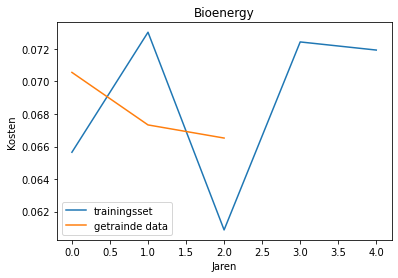

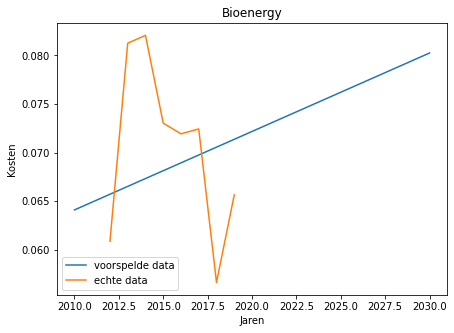

In [30]:
# Vervolg Bioenergy
ml.fit(x_train_Bioenergy, y_train_Bioenergy)

# Hierna doe je de voorspelling
y_pred_Bioenergy = ml.predict(x_test_Bioenergy)

#Je kan kijken wat het verschil is tussen de test en echte data
#print(y_train_Bioenergy, y_pred_Bioenergy)
plt.plot(y_train_Bioenergy, label = 'trainingsset')
plt.plot(y_pred_Bioenergy, label ='getrainde data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Bioenergy')
plt.legend()

#Nu doe je de voorspelling voor de kosten op basis van het aantal jaren dat je in de regressie wil
y_years = ml.predict(x_years)
#print(y_years)

#evalueer je model, hoe hoger de score hoe meer het zegt over de juistheid van het je model
print(r2_score(y_test_Bioenergy, y_pred_Bioenergy))

# plot je resultaat
plt.figure(figsize= (7,5))
plt.plot(x_years, y_years, label='voorspelde data')
plt.plot(x, y_Bioenergy, label= 'echte data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Bioenergy')
plt.legend()

# Bionergy is eigenlijk niet geschikt voor lineaire regressie. Dat zie je ook als je bijvoorbeeld kijkt naar de score, deze is zelfs negatief. Voor de conclusie maakt het niet uit, want het is duidelijk dat dit duurder is dan Solar. 



-6.842673871471713


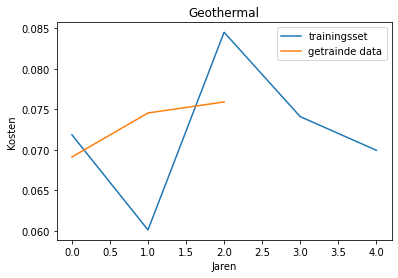

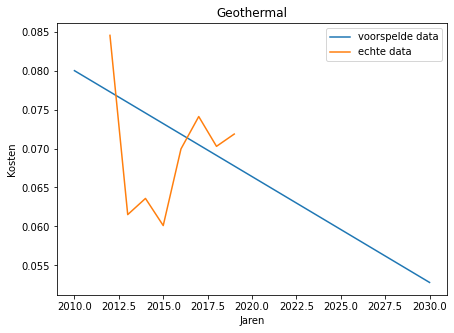

In [31]:
# Vervolg Geothermal
ml.fit(x_train_Geothermal, y_train_Geothermal)

# Hierna doe je de voorspelling
y_pred_Geothermal = ml.predict(x_test_Geothermal)

#Je kan kijken wat het verschil is tussen de test en echte data
#print(y_train_Geothermal, y_pred_Geothermal)
plt.plot(y_train_Geothermal, label = 'trainingsset')
plt.plot(y_pred_Geothermal, label ='getrainde data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Geothermal')
plt.legend()

#Nu doe je de voorspelling voor de kosten op basis van het aantal jaren dat je in de regressie wil
y_years = ml.predict(x_years)
#print(y_years)

#evalueer je model, hoe hoger de score hoe meer het zegt over de juistheid van het je model
print(r2_score(y_test_Geothermal, y_pred_Geothermal))

# plot je resultaat
plt.figure(figsize= (7,5))
plt.plot(x_years, y_years, label='voorspelde data')
plt.plot(x, y_Geothermal, label= 'echte data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Geothermal')
plt.legend()

#Ook bij geothermal zie je dat dee eigenlijk niet geschikt is voor lineaire regressie. Er is een slechte score maar ook hier geldt hetzelfde dat dit niet relevant is voor de conclusie. Solar blijft tot nu toe de goedkoopste. 


0.4100263424054251


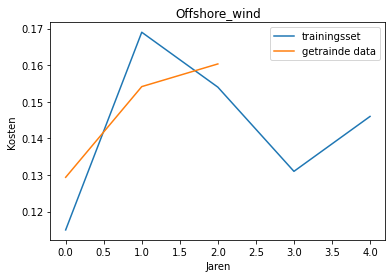

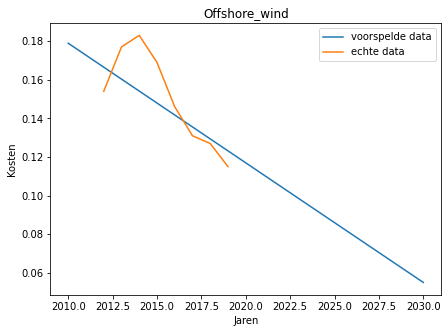

In [32]:
# Vervolg Offshore_wind
ml.fit(x_train_Offshore_wind, y_train_Offshore_wind)

# Hierna doe je de voorspelling
y_pred_Offshore_wind = ml.predict(x_test_Offshore_wind)

#Je kan kijken wat het verschil is tussen de test en echte data
#print(y_train_Offshore_wind, y_pred_Offshore_wind)
plt.plot(y_train_Offshore_wind, label = 'trainingsset')
plt.plot(y_pred_Offshore_wind, label ='getrainde data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Offshore_wind')
plt.legend()

#Nu doe je de voorspelling voor de kosten op basis van het aantal jaren dat je in de regressie wil
y_years = ml.predict(x_years)
#print(y_years)

#evalueer je model, hoe hoger de score hoe meer het zegt over de juistheid van het je model
print(r2_score(y_test_Offshore_wind, y_pred_Offshore_wind))

# plot je resultaat
plt.figure(figsize= (7,5))
plt.plot(x_years, y_years, label='voorspelde data')
plt.plot(x, y_Offshore_wind, label= 'echte data')
plt.xlabel('Jaren')
plt.ylabel('Kosten')
plt.title('Offshore_wind')
plt.legend()

# Je ziet dat de score gelijk een stuk beter is. Maar ondanks dat Off_shore wel geschikt is voor de lineaire regressie, blijft deze duurder dan Solartechnologie. 

In [37]:
#evalueer je model
print(r2_score(y_test_CSP, y_pred_CSP))
print(r2_score(y_test_Hydro, y_pred_Hydro))
print(r2_score(y_test_Solar, y_pred_Solar))
print(r2_score(y_test_Onshore_wind, y_pred_Onshore_wind))
print(r2_score(y_test_y_Bioenergy, y_pred_Bioenergy))
print(r2_score(y_test_Geothermal, y_pred_Geothermal))
print(r2_score(y_test_Offshore_wind, y_pred_Offshore_wind))

#Dit had ik ook kunnen doen voordat ik alle resultaten ging plotten. Eigenlijk heeft het alleen zin oim naar de positeive cijfers te kijken want deze zijn geschikt voor lineaire regressie.
#Dit had in dit geval voornamelijk geweest: Solar, Onshore Wind en Offshore Wind. De conclusie blijft het zelfde Solar wordt goedkoper in de toekomst. 


-1.3187696608753616
-32.83415890741058
0.9738108750741903
0.9551949637575728
-0.5034009443072667
-6.842673871471713
0.4100263424054251
